In [580]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [581]:
df = pd.read_excel('data_professionals_survey.xlsx')

In [582]:
df.shape

(630, 28)

In [583]:
df.columns

Index(['Unique ID', 'Email', 'Date Taken (America/New_York)',
       'Time Taken (America/New_York)', 'Browser', 'OS', 'City', 'Country',
       'Referrer', 'Time Spent',
       'Q1 - Which Title Best Fits your Current Role?',
       'Q2 - Did you switch careers into Data?',
       'Q3 - Current Yearly Salary (in USD)',
       'Q4 - What Industry do you work in?',
       'Q5 - Favorite Programming Language',
       'Q6 - How Happy are you in your Current Position with the following? (Salary)',
       'Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)',
       'Q6 - How Happy are you in your Current Position with the following? (Coworkers)',
       'Q6 - How Happy are you in your Current Position with the following? (Management)',
       'Q6 - How Happy are you in your Current Position with the following? (Upward Mobility)',
       'Q6 - How Happy are you in your Current Position with the following? (Learning New Things)',
       'Q7 - How difficult

In [584]:
df.drop(['Email','Browser','OS','City','Country','Referrer'], axis=1, inplace=True)

In [585]:
df.columns

Index(['Unique ID', 'Date Taken (America/New_York)',
       'Time Taken (America/New_York)', 'Time Spent',
       'Q1 - Which Title Best Fits your Current Role?',
       'Q2 - Did you switch careers into Data?',
       'Q3 - Current Yearly Salary (in USD)',
       'Q4 - What Industry do you work in?',
       'Q5 - Favorite Programming Language',
       'Q6 - How Happy are you in your Current Position with the following? (Salary)',
       'Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)',
       'Q6 - How Happy are you in your Current Position with the following? (Coworkers)',
       'Q6 - How Happy are you in your Current Position with the following? (Management)',
       'Q6 - How Happy are you in your Current Position with the following? (Upward Mobility)',
       'Q6 - How Happy are you in your Current Position with the following? (Learning New Things)',
       'Q7 - How difficult was it for you to break into Data?',
       'Q8 - If you were t

In [586]:
df[['Date Taken (America/New_York)','Time Taken (America/New_York)']].head()

,Date Taken (America/New_York),Time Taken (America/New_York)
0,6/10/2022,8:38
1,6/10/2022,8:40
2,6/10/2022,8:42
3,6/10/2022,8:43
4,6/10/2022,8:44


In [587]:
df[['Date Taken (America/New_York)','Time Taken (America/New_York)']].dtypes

Date Taken (America/New_York)    object
Time Taken (America/New_York)    object
dtype: object

In [588]:
df['Time Taken (America/New_York)'] = pd.to_datetime(df['Time Taken (America/New_York)'], format='%H:%M').dt.time

In [589]:
df['Date Taken (America/New_York)'] = pd.to_datetime(df['Date Taken (America/New_York)'])

In [590]:
df['Response Time'] = df['Date Taken (America/New_York)'] + pd.to_timedelta(df['Time Taken (America/New_York)'].astype(str))

In [591]:
df['Response Time'].head()

0   2022-06-10 08:38:00
1   2022-06-10 08:40:00
2   2022-06-10 08:42:00
3   2022-06-10 08:43:00
4   2022-06-10 08:44:00
Name: Response Time, dtype: datetime64[ns]

In [592]:
print(df['Unique ID'].count())
print('Unique ID:', df['Unique ID'].nunique())

630
Unique ID: 630


In [593]:
df.drop(columns=['Date Taken (America/New_York)', 'Time Taken (America/New_York)','Unique ID','Q13 - Ethnicity'], inplace=True)

In [594]:
df.rename(columns={'Time Spent':'Elapsed Time'}, inplace=True)

In [595]:
df.columns

Index(['Elapsed Time', 'Q1 - Which Title Best Fits your Current Role?',
       'Q2 - Did you switch careers into Data?',
       'Q3 - Current Yearly Salary (in USD)',
       'Q4 - What Industry do you work in?',
       'Q5 - Favorite Programming Language',
       'Q6 - How Happy are you in your Current Position with the following? (Salary)',
       'Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)',
       'Q6 - How Happy are you in your Current Position with the following? (Coworkers)',
       'Q6 - How Happy are you in your Current Position with the following? (Management)',
       'Q6 - How Happy are you in your Current Position with the following? (Upward Mobility)',
       'Q6 - How Happy are you in your Current Position with the following? (Learning New Things)',
       'Q7 - How difficult was it for you to break into Data?',
       'Q8 - If you were to look for a new job today, what would be the most important thing to you?',
       'Q9 - M

In [596]:
df.rename(columns= {
    'Q9 - Male/Female?': 'Gender',
    'Q10 - Current Age': 'Age',
    'Q11 - Which Country do you live in?': 'Country',
    'Q12 - Highest Level of Education': 'Education Level'}, inplace=True)


In [597]:
df.rename(columns= {
    'Q6 - How Happy are you in your Current Position with the following? (Salary)':  'Happiness (Salary)',
    'Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)': 'Happiness (Work/Life Balance)',
    'Q6 - How Happy are you in your Current Position with the following? (Coworkers)': 'Happiness (Coworkers)',
    'Q6 - How Happy are you in your Current Position with the following? (Management)': 'Happiness (Management)',
    'Q6 - How Happy are you in your Current Position with the following? (Upward Mobility)': 'Happiness (Upward Mobility)',
    'Q6 - How Happy are you in your Current Position with the following? (Learning New Things)': 'Happiness (Learning)',
    'Q7 - How difficult was it for you to break into Data?': 'Difficulty Breaking into Data',
    'Q8 - If you were to look for a new job today, what would be the most important thing to you?': 'Important Job Factors',
    'Q4 - What Industry do you work in?': 'Industry','Q2 - Did you switch careers into Data?': 'Did you switch careers into Data?',
    'Q3 - Current Yearly Salary (in USD)': 'Current Yearly Salary (in USD)',
    'Q5 - Favorite Programming Language': 'Favorite Programming Language',
    'Q1 - Which Title Best Fits your Current Role?': 'Title',
}, inplace=True)

In [598]:
df.columns

Index(['Elapsed Time', 'Title', 'Did you switch careers into Data?',
       'Current Yearly Salary (in USD)', 'Industry',
       'Favorite Programming Language', 'Happiness (Salary)',
       'Happiness (Work/Life Balance)', 'Happiness (Coworkers)',
       'Happiness (Management)', 'Happiness (Upward Mobility)',
       'Happiness (Learning)', 'Difficulty Breaking into Data',
       'Important Job Factors', 'Gender', 'Age', 'Country', 'Education Level',
       'Response Time'],
      dtype='object')

In [599]:
df = df[['Response Time',
       'Gender',
       'Age',
       'Country',
       'Education Level', 
       'Industry',
       'Title',
       'Did you switch careers into Data?',
       'Favorite Programming Language',
       'Current Yearly Salary (in USD)',
       'Happiness (Salary)',
       'Happiness (Work/Life Balance)',
       'Happiness (Coworkers)',
       'Happiness (Management)',
       'Happiness (Upward Mobility)',
       'Happiness (Learning)',
       'Difficulty Breaking into Data',
       'Important Job Factors',
       'Elapsed Time']]

In [600]:
df.head(1)

,Response Time,Gender,Age,Country,Education Level,Industry,Title,Did you switch careers into Data?,Favorite Programming Language,Current Yearly Salary (in USD),Happiness (Salary),Happiness (Work/Life Balance),Happiness (Coworkers),Happiness (Management),Happiness (Upward Mobility),Happiness (Learning),Difficulty Breaking into Data,Important Job Factors,Elapsed Time
0,2022-06-10 08:38:00,Male,26,United States,NaN,Healthcare,Data Analyst,Yes,Python,106k-125k,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,0:00:44


In [601]:
df.dtypes

Response Time                        datetime64[ns]
Gender                                       object
Age                                           int64
Country                                      object
Education Level                              object
Industry                                     object
Title                                        object
Did you switch careers into Data?            object
Favorite Programming Language                object
Current Yearly Salary (in USD)               object
Happiness (Salary)                          float64
Happiness (Work/Life Balance)               float64
Happiness (Coworkers)                       float64
Happiness (Management)                      float64
Happiness (Upward Mobility)                 float64
Happiness (Learning)                        float64
Difficulty Breaking into Data                object
Important Job Factors                        object
Elapsed Time                                 object
dtype: objec

In [602]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [603]:
df.Age = df.Age.astype('Int16')
df.Age.unique()

<IntegerArray>
[26, 36, 23, 35, 44, 33, 24, 28, 37, 32, 34, 30, 31, 29, 22, 43, 25, 42, 40,
 41, 38, 21, 27, 39, 51, 55, 45, 52, 50, 56, 20, 47, 54, 19, 92, 60, 53, 18,
 48, 58, 66]
Length: 41, dtype: Int16

In [604]:
df['Country'].nunique()

98

In [605]:
df['Country'].sort_values().unique()

array(['Canada', 'India', 'Other (Please Specify)',
       'Other (Please Specify): Somalia',
       'Other (Please Specify):Africa (Nigeria)',
       'Other (Please Specify):Aisa', 'Other (Please Specify):Algeria',
       'Other (Please Specify):Angola', 'Other (Please Specify):Antigua ',
       'Other (Please Specify):Argentina',
       'Other (Please Specify):Argentina ',
       'Other (Please Specify):Argentine', 'Other (Please Specify):Austr',
       'Other (Please Specify):Australia',
       'Other (Please Specify):Azerbaijan',
       'Other (Please Specify):Bangladesh ',
       'Other (Please Specify):Barbados',
       'Other (Please Specify):Belgium', 'Other (Please Specify):Brazik',
       'Other (Please Specify):Brazil', 'Other (Please Specify):Bulgaria',
       'Other (Please Specify):Chile', 'Other (Please Specify):Colombia',
       'Other (Please Specify):Costa Rica',
       'Other (Please Specify):Costa Rica ',
       'Other (Please Specify):Denmark', 'Other (Please Speci

In [606]:
df['Country'] = df['Country'].str.lower()
df['Country'] = df['Country'].str.strip()

In [607]:
df['Country'] = df['Country'].astype(str).apply(lambda x: x.replace('other (please specify):','').strip().capitalize())

In [608]:
df['Country'].sort_values().unique()

array(['Africa (nigeria)', 'Aisa', 'Algeria', 'Angola', 'Antigua',
       'Argentina', 'Argentine', 'Austr', 'Australia', 'Azerbaijan',
       'Bangladesh', 'Barbados', 'Belgium', 'Brazik', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa rica', 'Denmark',
       'Egypt', 'Fin', 'France', 'Germany', 'Ghana', 'Greece',
       'Hong kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ire', 'Irel',
       'Ireland', 'Israel', 'Japan', 'Kenua', 'Kenya', 'Kosovo', 'Leba',
       'Liberia', 'Macedonia', 'Malaysia', 'Mexico', 'Morocco',
       'Mozambique', 'Netherlands', 'Niger', 'Nigeria', 'Oman',
       'Other (please specify)', 'Pakistan', 'Panama', 'Peru', 'Perú',
       'Philippines', 'Poland', 'Portugal', 'Portugsl',
       'Republic democratic of congo', 'Romania', 'Saudi arabia',
       'Serbia', 'Sg', 'Singapore', 'Somalia', 'South africa',
       'South korea', 'Spain', 'Sri lanka', 'Sudan', 'Sweden', 'Thailand',
       'Tunisia', 'Turkey', 'Uae', 'United arab emirates'

In [609]:
country_corrections = {
    'Aisa': 'Asia',
    'Africa (nigeria)': 'Nigeria',
    'Brazik': 'Brazil',
    'Austr': 'Austria',
    'Kenua': 'kenya',
    'Ire': 'Ireland',
    'Irel': 'Ireland',
    'Portugsl': 'Portugal',
    'Sg': 'Singapore',
    'Perú': 'Peru',
    'Argentine': 'Argentina',
    'Fin': 'Finland',
    'Uzb':'Uzbekistan',
    'Republic democratic of congo': 'Democratic republic of the congo',
    'Uae': 'United arab emirates',
    'Other (please specify)': 'Other' # Remove if needed
}


In [610]:
df['Country'] = df['Country'].replace(country_corrections)

In [611]:
df['Country'].sort_values().unique()

array(['Algeria', 'Angola', 'Antigua', 'Argentina', 'Asia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa rica',
       'Democratic republic of the congo', 'Denmark', 'Egypt', 'Finland',
       'France', 'Germany', 'Ghana', 'Greece', 'Hong kong', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Japan', 'Kenya',
       'Kosovo', 'Leba', 'Liberia', 'Macedonia', 'Malaysia', 'Mexico',
       'Morocco', 'Mozambique', 'Netherlands', 'Niger', 'Nigeria', 'Oman',
       'Other', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Romania', 'Saudi arabia', 'Serbia', 'Singapore',
       'Somalia', 'South africa', 'South korea', 'Spain', 'Sri lanka',
       'Sudan', 'Sweden', 'Thailand', 'Tunisia', 'Turkey',
       'United arab emirates', 'United kingdom', 'United states',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'kenya'],
      dt

In [612]:
df['Country'].nunique()

76

In [613]:
df['Education Level'].unique()

array([nan, 'High School', 'Bachelors', 'Masters', 'Associates', 'PhD'],
      dtype=object)

In [614]:
df['Education Level'] = df['Education Level'].replace({None:'Unspecified'})

In [615]:
df['Education Level'].unique()

array(['Unspecified', 'High School', 'Bachelors', 'Masters', 'Associates',
       'PhD'], dtype=object)

In [616]:
df['Industry'] = df['Industry'].astype(str).apply(lambda x: x.replace('Other (Please Specify):','').strip())

In [617]:
print(df['Industry'].unique())
df['Industry'].nunique()


['Healthcare' 'Finance' 'Clean Energy' 'Coworking space' 'Retail'
 'Telecommunication' 'Logistics' 'Igaming' 'Tech' 'Education'
 'Construction' 'Aviation' 'Insurance' 'Energy' 'Oil and gas'
 'Other (Please Specify)' 'Automotive' 'Utili' 'Not working yet' 'Manufa'
 'Manufacturing (Chemicals)'
 'Currently studying . Previously worked in Power Generation'
 'Not working at the moment, but previously I have been into Education industry'
 'Third Party Logistics' 'Food & Beverage' 'Marketing' 'Advertising'
 'Staffing and Recruting' 'Biotech' 'Consulting' 'Consumer Elec'
 'Semiconductor manufacturing'
 'Supply Chain - warehousing, transpiration and' 'Distribution'
 'Customer Service' 'Ecom' 'Consulti' 'State Government' 'Culture'
 'Government' 'Manufacturing' 'Cons' 'Wholesale' 'Government programs'
 'Supply Chain' 'Entertainment' 'Aerospace' 'Foodservice Franchising'
 'Energy (oil and gas)' 'Market research' 'hospitality' 'Real Estate'
 'Chemical Manufacturing' 'Poultry' 'Renewable Resources'

137

In [618]:
df['Industry'] = df['Industry'].str.lower()

In [619]:
industry_mapping = {
    'advertising': ['advertising', 'media & advertising', 'digital marketing', 'marketing'],
    'aerospace and defense': ['aerospace', 'defense', 'space & defense', 'arrosp', 'aviation', 'avia'],
    'agriculture': ['agriculture', 'poultry'],
    'audit firm': ['audit firm'],
    'automobile': ['automobile', 'automotive'],
    'transportation': ['transportation', 'transpo'],
    'logistics': ['logistics', 'logistic', 'distribution', 'supply chain', 'chain'],
    'power and energy': ['power and energy', 'oil', 'gas', 'energy', 'renewable resources'],
    'manufacturing': ['manufacturing', 'manuf', 'manufa', 'construction', 'general contractor'],
    'government': ['government', 'gover', 'state', 'ngo - legislation', 'police / emergency services'],
    'electronics': ['electronics', 'electronic', 'consumer elec'],
    'utilities': ['utilities', 'utili'],
    'home and living': ['home and living', 'home', 'living'],
    'ecommerce': ['e-commerce', 'ecommerce', 'ecom'],
    'retail': ['retail', 'reta', 'fashion/online store', 'wholesale', 'warehouse'],
    'law enforcement': ['law enforcement', 'law', 'legal'],
    'food and beverage': ['food and beverage', 'food', 'culinary', 'fmcg'],
    'consulting': ['consulting', 'cons', 'consulti', 'cobsukting', 'professional services'],
    'education': ['education', 'taking bootcamp', 'demography and social statistics'],
    'unemployed': ['unemployed', 'unemployed, trying to switch career', 'student', 'looking for job', 'not ', 'none', 'homelessness'],
    'healthcare': ['healthcare', 'medical industry', 'biotech'],
    'hospitality': ['hospitality', 'coworking space'],
    'finance': ['finance', 'insurance'],
    'culture and social work': ['culture', 'social work', 'urbanism', 'nonprofit', 'non profit organization', 'non profit animal welfare'],
    'media and entertainment': ['entertainment', 'sports', 'media & advertising'],
    'data and technology': ['data insights company', 'it', 'tech', 'sensors', 'igaming'],
    'real estate': ['real estate'],
    'market research': ['market research'],
    'customer service': ['customer service', 'customer support'],
    'other': ['other (please specify)', 'outsourcing', 'workforce', 'interning in sciences, weather and meteorological data']
}


def map_industry(value):
    value = str(value) 
    for industry, keywords in industry_mapping.items():
        if any(keyword in value for keyword in keywords):
            return industry
    return value  

df['Industry'] = df['Industry'].apply(map_industry).str.capitalize()

In [620]:
print(df['Industry'].sort_values().unique())
df['Industry'].nunique()

['Advertising' 'Aerospace and defense' 'Agriculture' 'Audit firm'
 'Automobile' 'Consulting' 'Cosmetics' 'Culture and social work'
 'Currently studying . previously worked in power generation'
 'Customer service' 'Data and technology' 'Ecommerce' 'Education'
 'Electronics' 'Finance' 'Food and beverage' 'Government' 'Healthcare'
 'Home and living' 'Hospitality' 'Law enforcement' 'Logistics'
 'Management' 'Manufacturing' 'Market research' 'Media and entertainment'
 'Other' 'Power and energy' 'Research (non-clincial)' 'Retail'
 'Staffing and recruting' 'Transportation' 'Unemployed' 'Utilities']


34

In [621]:
df['Title'] = df['Title'].astype(str).apply(lambda x: x.replace('Other (Please Specify):','').strip())
df['Title'] = df['Title'].str.lower()


In [622]:
print(df['Title'].sort_values().unique())
df['Title'].nunique()

['account manager' 'ads operations' 'analyst'
 'analyst primary market intelligence' 'analytics consultant'
 'analytics engineer' 'analytics manager' 'bi consultant' 'bi developer'
 'bi manager' 'billing analyst' 'business analys' 'business analyst'
 'business intelligence analyst' 'business intelligence consultant'
 'business intelligence developer' 'business intelligence engineer'
 'consultant' 'continuous quality improvement specialist' 'data analyst'
 'data architect' 'data coordinator' 'data engineer' 'data integrity'
 'data manager' 'data scientist' 'data scientist intern' 'data steward'
 'database developer' 'database manager' 'dba' 'director'
 'director of data analytics' 'does a social media analyst count?'
 'driver' 'educator' 'finance analyst' 'financial analyst' 'fp&a analyst'
 'gis analyst'
 'i work with data tools and can create simple dashboards but i am not a data scientist'
 'incident manager' 'informatics specialist' 'insights analyst'
 'investigation specialist' 'jr.

80

In [623]:
job_mapping = {
 'account manager': ['account manager', 'client manager', 'customer manager'],
    'ads operations': ['ads operations', 'advertising operations', 'ad ops'],
    'business analyst': ['business analyst', 'business analys','ba', 'business analytics'],
    'business intelligence specialist': ['bi consultant', 'bi developer', 'bi manager', 'business analyst', 'business intelligence'],
    'consultant': ['consultant', 'advisor', 'strategist'],
    'continuous quality improvement specialist': ['quality improvement', 'quality specialist', 'process improvement'],
    'data analyst': ['data analyst', 'analyst', 'analytics'],
    'data architect': ['data architect', 'data architecture', 'database architect'],
    'data coordinator': ['data coordinator', 'data organizer', 'data administrator'],
    'data engineer': ['data engineer', 'data pipeline', 'etl developer'],
    'data integrity': ['data integrity', 'data validation', 'data quality'],
    'data manager': ['data manager', 'data management', 'information manager'],
    'data scientist': ['data scientist', 'machine learning', 'ai researcher'],
    'data steward': ['data steward', 'data governance', 'data custodian'],
    'database developer': ['database developer', 'db developer', 'sql developer'],
    'database manager': ['database manager', 'db manager', 'data administrator'],
    'dba': ['dba', 'database administrator', 'database admin'],
    'director': ['director', 'senior manager', 'executive'],
    'driver': ['driver', 'courier', 'logistics'],
    'educator': ['educator', 'teacher', 'trainer'],
    'incident manager': ['incident manager', 'problem manager', 'operations manager'],
    'informatics specialist': ['informatics specialist', 'health informatics', 'bioinformatics'],
    'investigation specialist': ['investigation specialist', 'investigator', 'research investigator'],
    'learning management specialist': ['learning management', 'lms specialist', 'training manager'],
    'manager': ['manager', 'team leader', 'supervisor'],
    'marketing data specialist': ['marketing data specialist', 'marketing analyst', 'campaign analyst'],
    'other': ['other', 'miscellaneous', 'please specify'],
    'unemployed': ['unemployed', 'student', 'looking for a job'],
    'pmo': ['pmo', 'project management office', 'project manager'],
    'presales engineer': ['presales engineer', 'solutions consultant', 'technical presales'],
    'product owner': ['product owner', 'product manager', 'scrum owner'],
    'reporting adm': ['reporting administrator', 'reporting specialist', 'reporting analyst'],
    'research associate': ['research associate', 'researcher', 'assistant researcher'],
    'rf engineer': ['rf engineer', 'radio frequency engineer', 'rf specialist'],
    'sales & marketing': ['sales & marketing', 'sales professional', 'marketing specialist'],
    'software engineer': ['software engineer', 'software developer', 'programmer'],
    'software support': ['software support', 'technical support', 'application support'],
    'student/looking/none': ['student', 'looking for a job', 'unemployed'],
    'support engineer': ['support engineer', 'technical support', 'it support'],
    'system administrator': ['system administrator', 'sysadmin', 'system admin'],
    'systems configuration': ['systems configuration', 'it systems', 'system setup'],
    'tableau admin': ['tableau admin', 'tableau specialist', 'tableau expert'],
    'technical consultant': ['technical consulta', 'it consultant', 'technical advisor'],  # Corrected typo
    'web developer': ['web developer', 'frontend developer', 'web designer']
   
}


def job_correction(value):
    value = str(value) 
    for job, keywords in job_mapping.items():
        if any(keyword in value for keyword in keywords):
            return job
    return value  

df['Title'] = df['Title'].apply(job_correction)


In [624]:
print(df['Title'].sort_values().unique())
df['Title'].nunique()

['account manager' 'ads operations' 'business analyst'
 'business intelligence specialist' 'consultant'
 'continuous quality improvement specialist' 'data analyst'
 'data architect' 'data coordinator' 'data engineer' 'data integrity'
 'data manager' 'data scientist' 'data steward' 'director' 'driver'
 'educator' 'incident manager' 'informatics specialist'
 'investigation specialist' 'learning management specialist' 'manager'
 'marketing data specialist' 'other' 'pmo' 'presales engineer'
 'product owner' 'reporting adm' 'research associate' 'rf engineer'
 'sales & marketing' 'software engineer' 'software support'
 'support engineer' 'system administrator' 'systems configuration'
 'tableau admin' 'technical consultant' 'unemployed' 'web developer']


40

In [625]:
df['Favorite Programming Language'] = df['Favorite Programming Language'].astype(str).apply(lambda x: x.replace('Other:','').strip())
df['Favorite Programming Language'] = df['Favorite Programming Language'].str.lower()
print(df['Favorite Programming Language'].sort_values().unique())

['altery' 'c#' 'c/c++' 'dax' 'dont require' 'excel' 'excel/sql'
 'i currently do not work with programming languages yet'
 'i do analysis and create presentations based on datasets provided by others'
 "i don't use programming in my role" 'i don’t know any'
 'i mean, i mostly work in sql and its variants?'
 "if sql is categorised as a programming language then i will definitely say sql. since i am still learning, i can't give a definite answer in relation to the abover mentioned but for the sake of choosing i will say r then followed by python"
 'java' 'javascript' 'just started learning'
 'knowledge of excel and sql yet' 'mainly use excel' 'matlab'
 'mostly use sql but that’s not programming language..' 'na' 'none'
 'none at the moment' 'other' 'php' 'power bi' 'python'
 'qlik sense script' 'r' 'sas' 'sas sql' 'sql' 'sql &  plsql'
 'sql because that is all i know really well so far.' 'sql postgres'
 'stata' 'unknown' 'vba']


In [626]:
languages_categories = {
    "sql & plsql": ["sql & plsql"],
    "altery": ["altery"],
    "sas": ["sas"],
    "c#": ["c#"],
    "c/c++": ["c/c++"],
    "dax": ["dax","excel","power bi"],
    "sql": ["sql"],
    "javascript": ["javascript"],
    "java": ["java"],
    "unspecified": ["unknown",'dont require','other'],
    None: ["none", "na", "nan", "null", "nil", "n/a", "unknown","do not",'don',"just started learning"],
}
def language_correction(value):
    value = str(value) 
    for lang, keywords in languages_categories.items():
        if any(keyword in value for keyword in keywords):
            return lang
    return value  

df['Favorite Programming Language'] = df['Favorite Programming Language'].apply(language_correction)



In [627]:
print(df['Favorite Programming Language'].sort_values().unique())

['altery' 'c#' 'c/c++' 'dax' 'java' 'javascript' 'matlab' 'php' 'python'
 'qlik sense script' 'r' 'sas' 'sql' 'stata' 'unspecified' 'vba' None]


<Axes: xlabel='Favorite Programming Language', ylabel='count'>

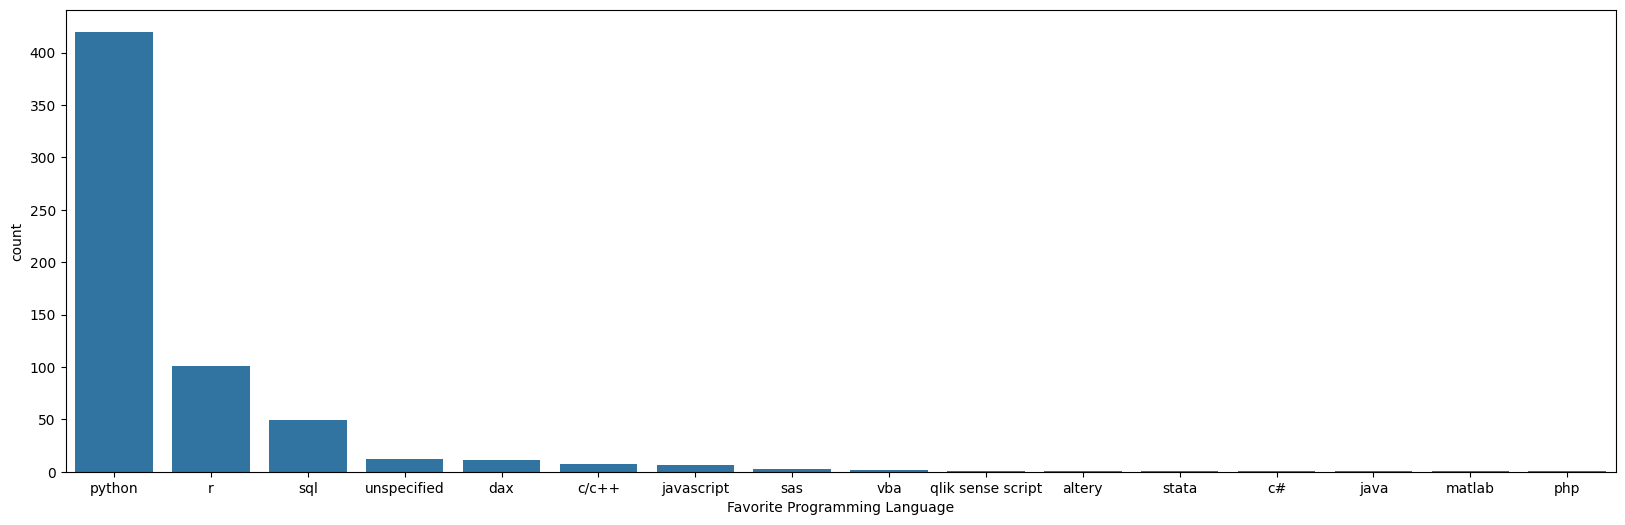

In [628]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='Favorite Programming Language', order=df['Favorite Programming Language'].value_counts().index)

In [629]:
df['Title'] = df['Title'].str.capitalize()
df['Favorite Programming Language'] = df['Favorite Programming Language'].str.capitalize()